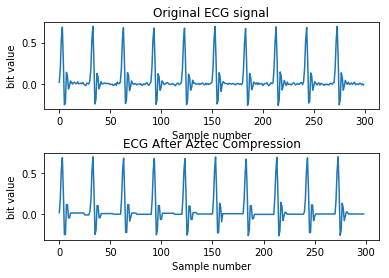

In [40]:
import csv
import pylab
import numpy as np


# AZTEC Algorithm

# Read ECG Values from csv file

filename = "ecg_values.csv"

with open(filename, 'r') as csvfile:
    ecg_vals = csvfile.readlines()

csvfile.close()

# Initializations | AZTEC

ecg_vals = [float(x) for x in ecg_vals]

# Threshold as average of all sample values
Vth = sum(ecg_vals)/len(ecg_vals)
Ln, t = 0, 0
V = list()
Length = list()
ecg_vals_len = len(ecg_vals)
Vmax = Vmin = Vmax1 = Vmin1 = 0

def store(v_max, v_min):
    """Store average amplitude of the plateau and length"""
    for i in range(Ln):
        V.append((v_max+v_min)/2)
    Length.append(Ln - 1)

while t < ecg_vals_len - 1:
    Vmax = Vmin = Vmax1 = Vmin1 = ecg_vals[t]
    while t < ecg_vals_len - 1:
        if Ln >= 50:
            store(Vmax, Vmin)
            Ln = 0
            break
        else:
            Ln += 1
            t += 1

            if ecg_vals[t] > Vmax:
                Vmax1 = ecg_vals[t]
            elif ecg_vals[t] < Vmin:
                Vmin1 = ecg_vals[t]

            if Vmax1 - Vmin1 > Vth:
                store(Vmax, Vmin)
                Ln = 0
                break
            else:
                Vmax = Vmax1
                Vmin = Vmin1

# append last values to match data length(or run length)
# Plot ECG waveforms
for i in range(Ln+1):
    store(Vmax, Vmin)
    Ln = 0

ecg = []
with open('ecg_values.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        ecg.append(float(row[0]))

csvFile.close()

ecg_final = np.array(ecg, dtype=np.float32)

aztecCSV = 'aztec_vals.csv'
file = open(aztecCSV, 'w', newline='')
writer = csv.writer(file)
writer.writerows(map(lambda x: [x], V))
file.close()

aztecEcg = []
with open('aztec_vals.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        aztecEcg.append(float(row[0]))
csvFile.close()

ecg_aztec = np.array(aztecEcg, dtype=np.float32)


hspace = .5
pylab.subplots_adjust(hspace=hspace)
pylab.subplot(2, 1, 1)
pylab.plot(ecg_final)
pylab.xlabel('Sample number')
pylab.ylabel('bit value')
pylab.title('Original ECG signal')

pylab.subplot(2, 1, 2)
pylab.plot(ecg_aztec)
pylab.xlabel('Sample number')
pylab.ylabel('bit value')
pylab.title('ECG After Aztec Compression')

pylab.show()

In [41]:
len(ecg_final)

300

In [42]:
len(ecg_aztec)

299

In [43]:
Ln

0

In [44]:
Length

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 13,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 11,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 4,
 14,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 11,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 3,
 15,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 20,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 19,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 16,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 19,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 15,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1]